<a href="https://colab.research.google.com/github/JoHanGyun/python.if/blob/main/%EC%A1%B0%ED%95%9C%EA%B7%A0_0_%EB%A9%94%EB%8B%AC_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EB%B6%84%EC%84%9D(%EC%8B%A4%EC%8A%B5).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#🥇 **올림픽 메달 분석하기**

###**※ <u>Colab에서 한글 사용을 위한 사전 작업</u> ※**
- 코랩에서 한글을 사용하려면 런타임을 실행중인 가상머신(VM)에 한글폰트를 설치해야 한다.
- 설치가 완료되면 최상위 디렉터리에서 usr/share/fonts 밑에 폰트가 추가된다.
- 폰트의 설치가 완료된 후에는 <u>런타임을 재시작해야 설치된 폰트를 정상적으로 사용</u>할 수 있다. <br>
<font color='tomato'>★ 재시작 방법 : [런타임] > [런타임 재시작]</font>

In [2]:
# 한글 나눔글꼴을 설치하기 위한 셸 명령어 실행, 실행 후 런타임 재시작
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 16 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

###**※ <u>반복 가능한 객체와 enumerate() 함수</u> ※**
- enumerate()는 리스트(튜플, 문자열)의 인덱스와 요소를 포함하는 enumerate 객체를 반환한다.
- enumerate 객체는 반복 가능한(iterable) 객체로, for문에서 사용할 수 있다. (Ex. 리스트, 튜플, 문자열, range, enumerate)
- 리스트의 요소를 반복할 때 현재 인덱스가 몇번째인지 확인해야 하는 경우 사용한다.

In [1]:
fruits =['사과', '키위', '바나나']

In [2]:
# enumerate() 함수 반환값 살펴보기
print(enumerate(fruits))

In [3]:
# enumerate() 함수 반환값의 타입 살펴보기
print(type(enumerate(fruits)))

<class 'enumerate'>


In [4]:
# enumerate() 함수 반환값을 리스트로 변환하여 살펴보기
print(list(enumerate(fruits)))

[(0, '사과'), (1, '키위'), (2, '바나나')]


In [5]:
# for문에서 enumerate() 함수 사용하기
for i, val in enumerate(fruits):
  print(f'{i}번째 요소는 {val}')

0번째 요소는 사과
1번째 요소는 키위
2번째 요소는 바나나


위 코드를 enumerate()를 사용하지 않고 다른 방법으로 해결해보자.

In [10]:
# 인덱스와 과일이름 함께 출력하기
for i in range(len(fruits)):
  print(i,"번째 요소는",fruits[i])

0 번째 요소는 사과
1 번째 요소는 키위
2 번째 요소는 바나나


In [17]:
for val in fruits:
  print(f'{i}번째 요소는 {val}')
  i+=1

1번째 요소는 사과
2번째 요소는 키위
3번째 요소는 바나나


###**▶ 파이썬 리스트 복습하기**
> 데이터 분석 실습에서 분석할 데이터는 주로 리스트로 취급하여 처리할 것이다. <br>
앞으로의 실습을 위해 파이썬의 리스트와 반복문을 복습해보자.

1. 올림픽 메달 획득 현황을 나타내는 2차원 리스트 "medals"을 만들어보자.<br>
 - 리스트의 요소는 각각 국가명, 금메달, 은메달, 동메달의 개수를 의미한다. (예) 미국은 금 46개, 은 37개, 동 38개 획득
  - 요소의 순서는 해당 국가의 올림픽 종합 순위에 따라 정렬되어 있다.

In [14]:
medals = [['미국', 46, 37, 38], ['영국', 27, 23, 17], ['중국', 26, 18, 26], ['러시아', 19, 18, 19], ['독일', 17, 10, 15], ['일본', 12, 8, 21], ['프랑스', 10, 18, 14], ['대한민국', 9, 3, 9]]

2. 국가별로 획득한 전체 메달 수를 국가별 리스트의 마지막 요소로 추가해보자. (※ sum(리스트) : 리스트의 모든 요소의 총합)

In [15]:
for row in medals:
  row.append(sum(row[1:]))

3. 종합 순위를 국가별 리스트의 첫번째 요소로 추가해보자.


In [16]:
for i, row in enumerate(medals):
  row.insert(0,i+1)

4. 다음 코드의 실행결과를 예상해보자.


In [17]:
medals

[[1, '미국', 46, 37, 38, 121],
 [2, '영국', 27, 23, 17, 67],
 [3, '중국', 26, 18, 26, 70],
 [4, '러시아', 19, 18, 19, 56],
 [5, '독일', 17, 10, 15, 42],
 [6, '일본', 12, 8, 21, 41],
 [7, '프랑스', 10, 18, 14, 42],
 [8, '대한민국', 9, 3, 9, 21]]

In [7]:
medals[0]

['미국', 46, 37, 38, 121]

In [8]:
medals[0][1]

46

5. 나라이름만 뽑아서 리스트 "nation"을 만들어보자.

In [18]:
nation = []
for row in medals:
  nation.append(row[1])
print(f'국가: {nation}')

국가: ['미국', '영국', '중국', '러시아', '독일', '일본', '프랑스', '대한민국']


6. 나라별 금메달, 은메달, 동메달 개수를 뽑아서 리스트 "gold", "silver", "bronze"를 만들어보자.

In [19]:
gold, silver, bronze = [], [], []
for row in medals:
  gold.append(row[2])
  silver.append(row[3])
  bronze.append(row[4])
print(f'금메달 개수: {gold}')
print(f'은메달 개수: {silver}')
print(f'동메달 개수: {bronze}')

금메달 개수: [46, 27, 26, 19, 17, 12, 10, 9]
은메달 개수: [37, 23, 18, 18, 10, 8, 18, 3]
동메달 개수: [38, 17, 26, 19, 15, 21, 14, 9]


###**▶ 파이썬 데이터 시각화 맛보기**
> [맷플롯립(Matplotlib)](https://matplotlib.org/)은 파이썬에서 가장 많이 사용되는 데이터 시각화 패키지이다. <br>
맷플롯립을 이용해 앞에서 생성한 올림픽 메달 데이터를 그래프로 그려보자.

<u>＃준비작업 1. 맷플롯립(Matplotlib) 임포트 하기</u><br>
외부 모듈에 정의된 함수, 클래스, 변수 등에 접근하려면 해당 모듈을 먼저 임포트 해야한다.<br>
맷플롯립의 서브 패키지인 [파이플롯(pyplot)](https://matplotlib.org/stable/api/pyplot_summary.html)을 plt 라는 이름으로 임포트 해보자.

In [11]:
# Matplotlib 임포트
import matplotlib.pyplot as plt

<u>＃준비작업 2. 한글 사용 설정하기</u><br>
맷플롯립은 기본적으로는 한글을 지원하지 않기 때문에 시스템에 설치된 한글 폰트를 사용하도록 별도로 지정해주는 작업이 필요하다.
- 시스템에 폰트 설치하기
- 맷플롯립에서 사용할 커스텀 폰트 설정하기

폰트 첫 번째 셀에서 이미 설치했기 때문에 여기서는 맷플롯립 설정부터 시작한다.


In [12]:
# Matplotlib에서 사용할 폰트를 설치한 나눔글꼴로 설정
plt.rc('font', family='NanumBarunGothic')

나라별 획득한 금메달의 개수를 꺾은선 그래프로 그려보자.
- title() : 도표(axes)의 제목을 설정하는 함수
- plot() : 데이터(x, y)를 도표(axes)에 선 또는 점으로 추가하는 함수
- legend() : 도표(axes)에 범례를 추가하는 함수
- show() : 그림(figure)을 화면에 보여주는 함수

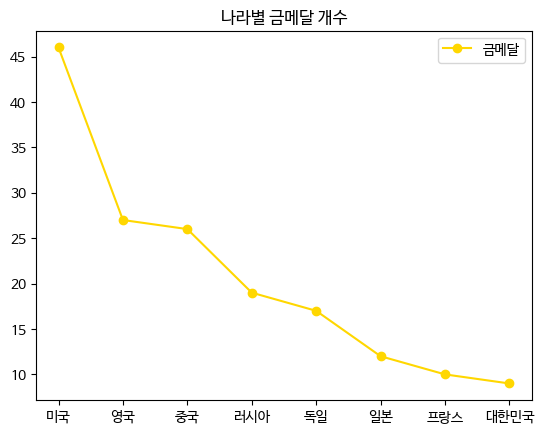

In [26]:
# 도표(axes)의 제목 설정하기 (나라별 금메달 개수)
plt.title("나라별 금메달 개수")
# 꺾은선 그래프 그리기
plt.plot(nation,gold,color='gold',marker='o',label='금메달')
# 범례 추가하기
plt.legend()
# 그래프 보여주기
plt.show()

나라별 획득한 은메달의 개수를 꺾은선 그래프로 그려보자.

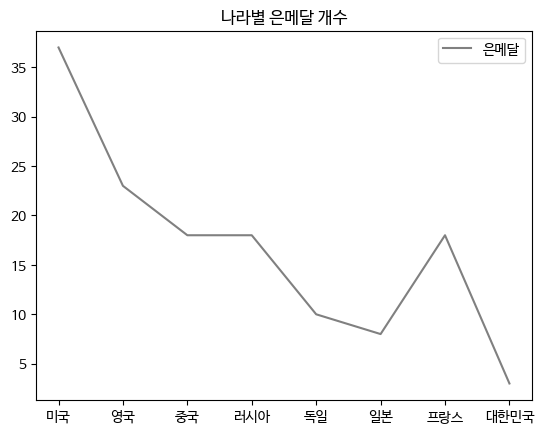

In [31]:
# 도표(axes)의 제목 설정하기 (나라별 은메달 개수)
plt.title("나라별 은메달 개수")
# 꺾은선 그래프 그리기
plt.plot(nation,silver,color='gray',label='은메달')
# 범례 추가하기
plt.legend()
# 그래프 보여주기
plt.show()

나라별 획득한 동메달의 개수를 꺾은선 그래프로 그려보자.

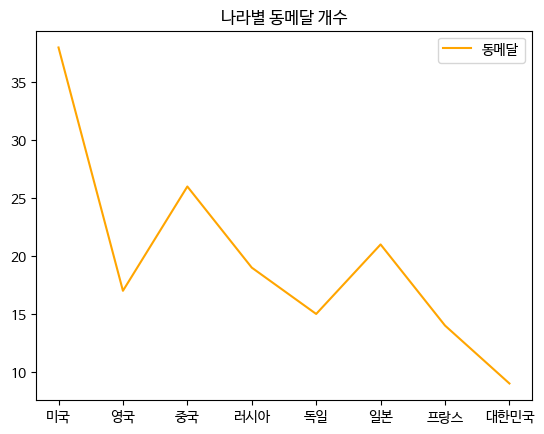

In [33]:
# 도표(axes)의 제목 설정하기 (나라별 동메달 개수)
plt.title("나라별 동메달 개수")
# 꺾은선 그래프 그리기
plt.plot(nation,bronze,color='orange',label='동메달')
# 범례 추가하기
plt.legend()
# 그래프 보여주기
plt.show()

나라별 획득한 세 종류 메달의 개수를 나타낸 꺾은선 그래프를 한 도표에 그려보자.

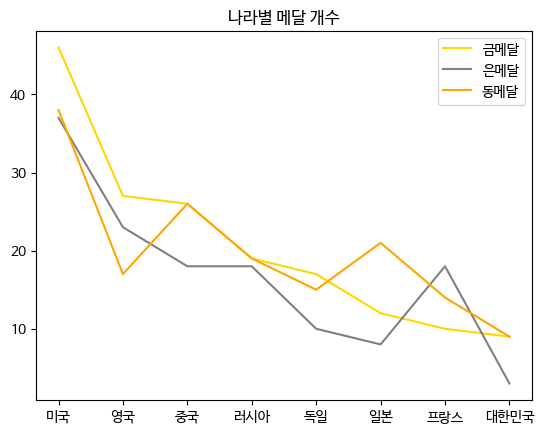

In [35]:
# 도표(axes)의 제목 설정하기 (나라별 메달 개수)
plt.title("나라별 메달 개수")
# 꺾은선 그래프 그리기
plt.plot(nation,gold,color='gold',label='금메달')
plt.plot(nation,silver,color='gray',label='은메달')
plt.plot(nation,bronze,color='orange',label='동메달')
# 범례 추가하기
plt.legend()
# 그래프 보여주기
plt.show()